<a href="https://colab.research.google.com/github/korivianilkumarreddy/CODSOFT/blob/main/codsoft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/IMDb Movies India.csv", encoding='latin-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.drop(columns=['Year','Name','Duration'],axis=1)
data

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...
15504,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     13632 non-null  object 
 1   Rating    7919 non-null   float64
 2   Votes     7920 non-null   object 
 3   Director  14984 non-null  object 
 4   Actor 1   13892 non-null  object 
 5   Actor 2   13125 non-null  object 
 6   Actor 3   12365 non-null  object 
dtypes: float64(1), object(6)
memory usage: 848.3+ KB


In [ ]:
rating = data['Rating'].mean()
data['Rating'] = data['Rating'].fillna(rating)

data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
votes = data['Votes'].mean()


data['Votes'] = data['Votes'].fillna(votes)




In [ ]:
data.isnull().sum()

,0
Genre,1877
Rating,0
Votes,0
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
data.describe()

,Rating,Votes
count,15509.000000,15509.000000
mean,5.841621,120.839493
std,0.987343,126.187975
min,1.100000,5.000000
25%,5.841621,52.000000
50%,5.841621,120.839493
75%,6.000000,120.839493
max,10.000000,999.000000


In [ ]:
data.shape

(15509, 7)

In [ ]:
data.columns


Index(['Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
data['Director'] = data['Director'].astype('category').cat.codes.replace(-1, np.nan)
data['Actor 1'] = data['Actor 1'].astype('category').cat.codes.replace(-1, np.nan)
data['Genre'] = data['Genre'].astype('category').cat.codes.replace(-1, np.nan)
data['Actor 2'] = data['Actor 2'].astype('category').cat.codes.replace(-1, np.nan)
data['Actor 3'] = data['Actor 3'].astype('category').cat.codes.replace(-1, np.nan)


In [ ]:
data.tail(10)

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,0.0,5.841621,120.839493,5362.0,1366.0,3886.0,1855.0
15500,0.0,5.841621,120.839493,849.0,2563.0,4705.0,NaN
15501,29.0,5.300000,135.000000,945.0,1139.0,2440.0,1291.0
15502,0.0,5.841621,120.839493,1398.0,3227.0,1547.0,4535.0
15503,29.0,5.800000,44.000000,4416.0,990.0,1596.0,3135.0
15504,0.0,4.600000,11.000000,2690.0,2586.0,4299.0,4262.0
15505,40.0,4.500000,655.000000,2499.0,227.0,4532.0,519.0
15506,0.0,5.841621,120.839493,2424.0,3609.0,NaN,NaN
15507,0.0,5.841621,120.839493,NaN,NaN,NaN,NaN
15508,40.0,6.200000,20.000000,2195.0,1139.0,1589.0,490.0


In [ ]:
imputer = KNNImputer(n_neighbors=5)
data[['Director', 'Actor 1','Actor 2','Actor 3' ,'Genre']] = imputer.fit_transform(data[['Director', 'Actor 1','Actor 2','Actor 3' ,'Genre']])
data.tail(10)


,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,0.0,5.841621,120.839493,5362.0,1366.0,3886.0,1855.0
15500,0.0,5.841621,120.839493,849.0,2563.0,4705.0,2926.4
15501,29.0,5.300000,135.000000,945.0,1139.0,2440.0,1291.0
15502,0.0,5.841621,120.839493,1398.0,3227.0,1547.0,4535.0
15503,29.0,5.800000,44.000000,4416.0,990.0,1596.0,3135.0
15504,0.0,4.600000,11.000000,2690.0,2586.0,4299.0,4262.0
15505,40.0,4.500000,655.000000,2499.0,227.0,4532.0,519.0
15506,0.0,5.841621,120.839493,2424.0,3609.0,1214.4,1964.8
15507,0.0,5.841621,120.839493,3196.6,2680.8,2017.8,2387.0
15508,40.0,6.200000,20.000000,2195.0,1139.0,1589.0,490.0


In [ ]:
target_code = 1308.0


filtered_data = data[data['Actor 2'] == target_code]


print(filtered_data)

      Genre    Rating       Votes  Director  Actor 1  Actor 2  Actor 3
2178  299.0  5.841621  120.839493    3624.0   3290.0   1308.0    909.0
2855  287.2  5.841621  120.839493      69.0   3483.0   1308.0   2233.0


In [ ]:
data.isnull().sum()

,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
target_variable = 'Rating'
correlations = data.corr()[target_variable].sort_values(ascending=False)

print(correlations)

Rating      1.000000
Genre       0.089183
Actor 2     0.027006
Actor 3     0.025220
Actor 1     0.015632
Director   -0.006445
Votes      -0.008229
Name: Rating, dtype: float64


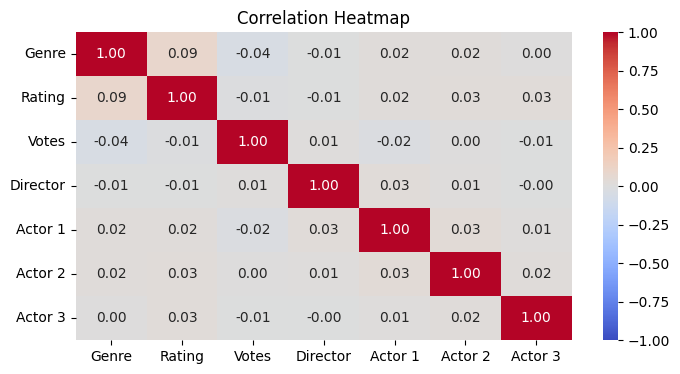

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



director_freq = data['Director'].value_counts().to_dict()
data['director_freq'] = data['Director'].map(director_freq)
actor_freq_1 = data['Actor 1'].value_counts().to_dict()
data['actor_freq_1'] = data['Actor 1'].map(actor_freq_1)
actor_freq_2 = data['Actor 2'].value_counts().to_dict()
data['actor_freq_2'] = data['Actor 2'].map(actor_freq_2)
actor_freq_3 = data['Actor 3'].value_counts().to_dict()
data['actor_freq_3'] = data['Actor 3'].map(actor_freq_3)


director_target_mean = data.groupby('Director')['Rating'].mean().to_dict()
data['director_target'] = data['Director'].map(director_target_mean)

actor_target_mean_1 = data.groupby('Actor 1')['Rating'].mean().to_dict()
data['actor_target_1'] = data['Actor 1'].map(actor_target_mean_1)
actor_target_mean_2 = data.groupby('Actor 2')['Rating'].mean().to_dict()
data['actor_target_2'] = data['Actor 2'].map(actor_target_mean_2)
actor_target_mean_3 = data.groupby('Actor 3')['Rating'].mean().to_dict()
data['actor_target_3'] = data['Actor 3'].map(actor_target_mean_3)

data.drop(['Director', 'Actor 1','Actor 2','Actor 3'], axis=1, inplace=True)


X = data.drop('Rating', axis=1)
y = data['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.2958422458897841
R² Score: 0.6926242070192581


In [ ]:
X_train.columns

Index(['Genre', 'Votes', 'director_freq', 'actor_freq_1', 'actor_freq_2',
       'actor_freq_3', 'director_target', 'actor_target_1', 'actor_target_2',
       'actor_target_3'],
      dtype='object')

<ipython-input-235-e08c59856730>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


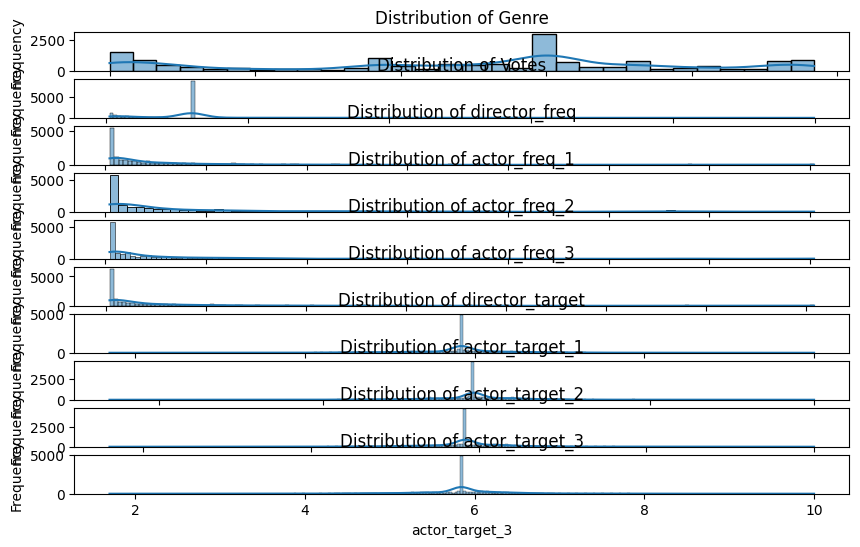

In [ ]:
features = ['Genre','Votes','director_freq','actor_freq_1','actor_freq_2','actor_freq_3','director_target','actor_target_1','actor_target_2','actor_target_3']
fig, axes = plt.subplots(len(features), 1, figsize=(10, 6))

for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.2958422458897841
R-squared: 0.6926242070192581


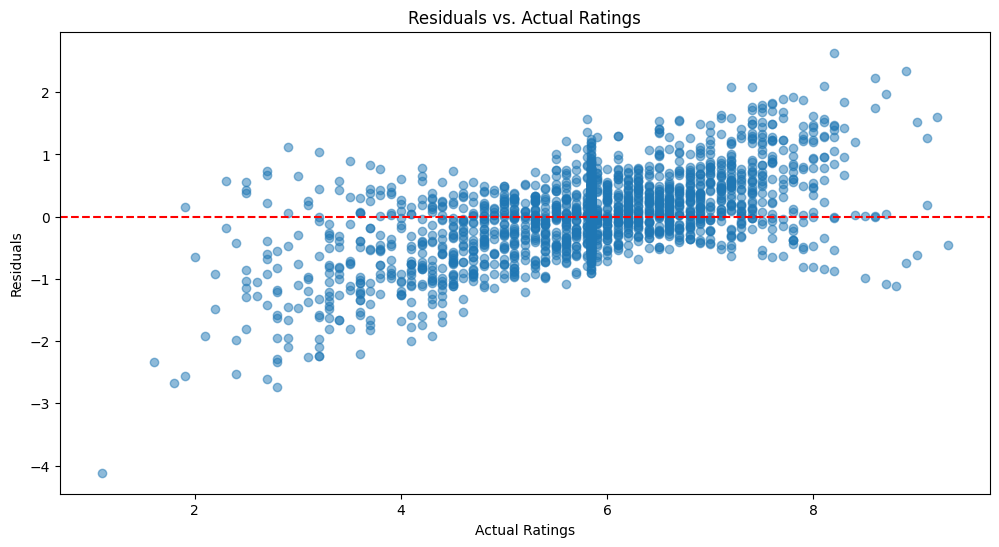

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))


plt.scatter(y_test,residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Ratings')


plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting - MSE: {mse}, R²: {r2}')

Gradient Boosting - MSE: 0.2520331474493757, R²: 0.7381412234696694


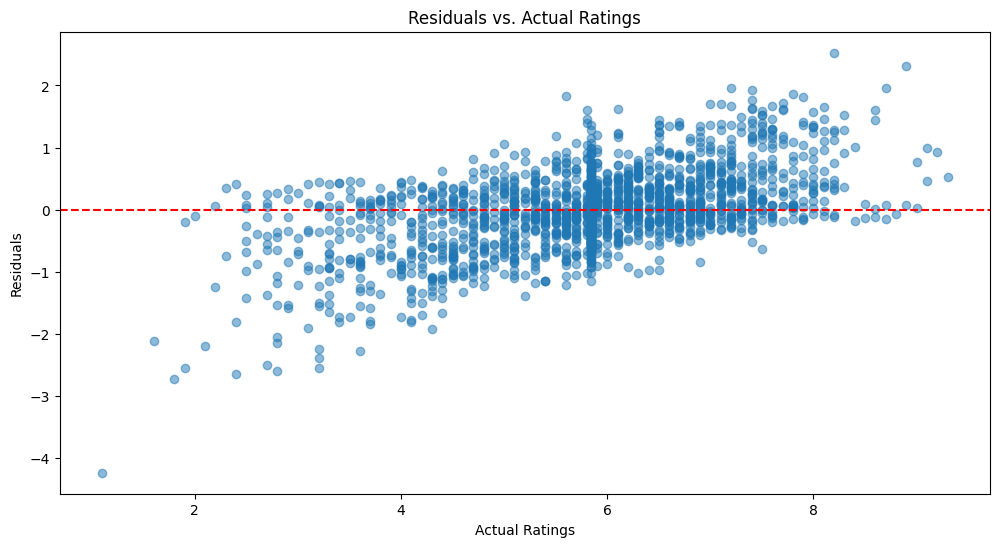

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))


plt.scatter(y_test,residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Ratings')


plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest - MSE: {mse}, R²: {r2}')


Random Forest - MSE: 0.22357288848240373, R²: 0.7677110188249592


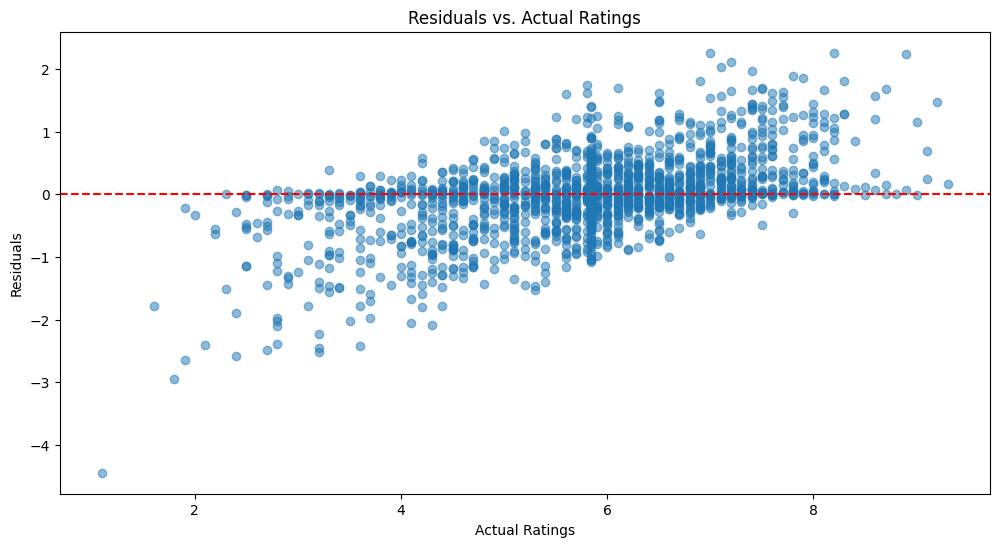

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))


plt.scatter(y_test,residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Ratings')


plt.show()

In [ ]:
data.head()

,Genre,Rating,Votes,director_freq,actor_freq_1,actor_freq_2,actor_freq_3,director_target,actor_target_1,actor_target_2,actor_target_3
0,299.0,5.841621,120.839493,2,2,35,2,5.770811,5.841621,5.544262,5.841621
1,299.0,7.000000,8.000000,1,2,1,1,7.000000,6.850000,7.000000,7.000000
2,351.0,5.841621,120.839493,1,3,3,1,5.841621,6.227748,6.847207,5.841621
3,228.0,4.400000,35.000000,1,5,1,2,4.400000,5.420000,4.400000,4.450000
4,299.0,5.841621,120.839493,7,6,9,3,6.263089,6.806937,5.764805,5.547207
